# **import and read-check**

In [1]:
import cv2

In [2]:
img1 = cv2.imread("DATA\dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [3]:
import matplotlib.pyplot as plt

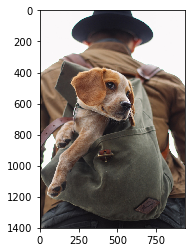

In [4]:
plt.imshow(img1)

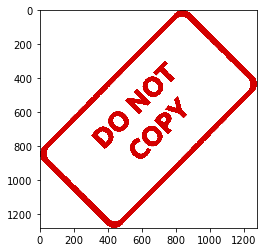

In [5]:
plt.imshow(img2)

In [6]:
img1.shape

(1401, 934, 3)

In [7]:
img2.shape

(1280, 1277, 3)

### **LENDIng IMAGES OF THE SAME SIZE**

In [8]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

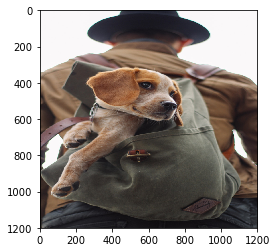

In [9]:
plt.imshow(img1)

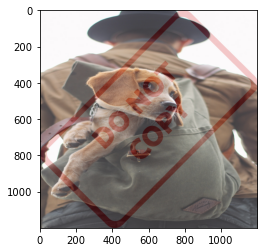

In [30]:
blended = cv2.addWeighted(src1= img1, alpha=0.8, src2= img2, beta=0.2, gamma=0.5)
plt.imshow(blended)

### **OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)**

In [31]:
img1 = cv2.imread("DATA\dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [32]:
img2 = cv2.resize(img2, (600,600))

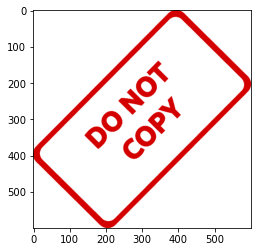

In [33]:
plt.imshow(img2)

In [34]:
large_img = img1
small_img = img2

In [35]:
x_offset = 0
y_offset = 0

In [36]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [37]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

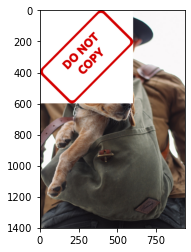

In [38]:
plt.imshow(large_img)

### **Masking**

In [39]:
img1 = cv2.imread("DATA\dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA\watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [40]:
img2 = cv2.resize(img2, (600,600))

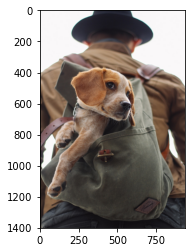

In [41]:
plt.imshow(img1)

In [42]:
img1.shape

(1401, 934, 3)

In [43]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [44]:
img2.shape  

(600, 600, 3)

In [45]:
rows, cols, channels = img2.shape

In [46]:
roi = img1[y_offset:1401, x_offset: 943]

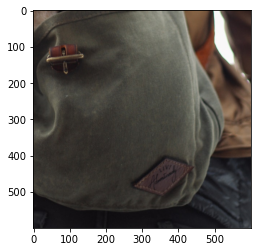

In [47]:
plt.imshow(roi)

In [48]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

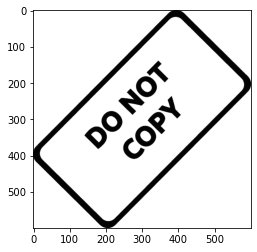

In [49]:
plt.imshow(img2gray, cmap='gray')

In [50]:
mask_inv = cv2.bitwise_not(img2gray)

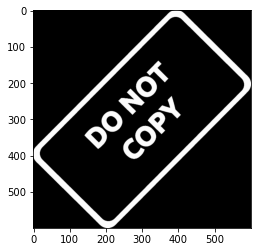

In [53]:
plt.imshow(mask_inv, cmap='gray')

In [54]:
mask_inv.shape

(600, 600)

In [55]:
import numpy as np

In [56]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [57]:
white_background.shape

(600, 600, 3)

In [59]:
bg = cv2.bitwise_or(white_background, white_background, mask= mask_inv)

In [60]:
bg.shape

(600, 600, 3)

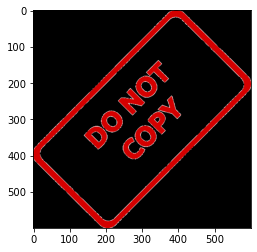

In [61]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

In [62]:
final_roi = cv2.bitwise_or(roi, fg)

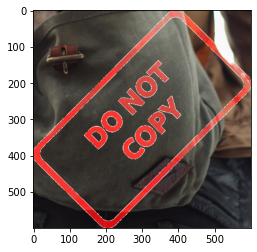

In [63]:
plt.imshow(final_roi)

In [64]:
large_img = img1
small_img = final_roi

In [68]:
large_img[y_offset: y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

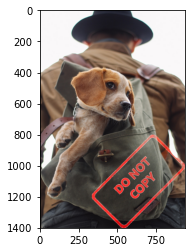

In [69]:
plt.imshow(large_img)